In [29]:
#import the libraries
import pandas as pd
import matplotlib.pyplot as plt

# load the data
df = pd.read_csv(r"C:\Users\mohit\OneDrive\Documents\netflix_titles.csv")
# df[df['type']=='Movie'].head(10)
# understanding the dataset first
print(df.info())
print(df.index)
print(df.shape)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [27]:
# release_count = df[df['type']=='TV Show']['release_year'].value_counts().sort_index()
# release_count
# shows_count = df['country'].value_counts().sort_index()
# shows_count.head(10)

country
, France, Algeria                                       1
, South Korea                                           1
Argentina                                              56
Argentina, Brazil, France, Poland, Germany, Denmark     1
Argentina, Chile                                        2
Argentina, Chile, Peru                                  1
Argentina, France                                       1
Argentina, France, United States, Germany, Qatar        1
Argentina, Italy                                        1
Argentina, Spain                                        8
Name: count, dtype: int64

# 

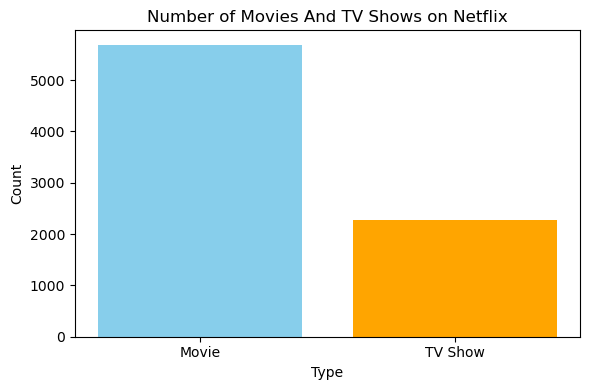

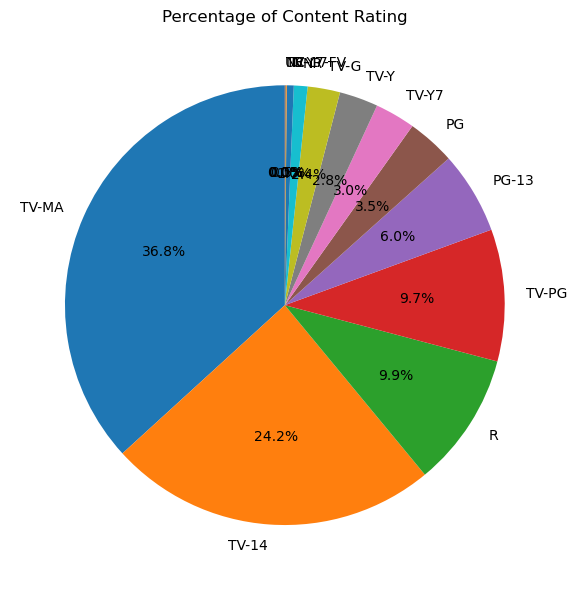

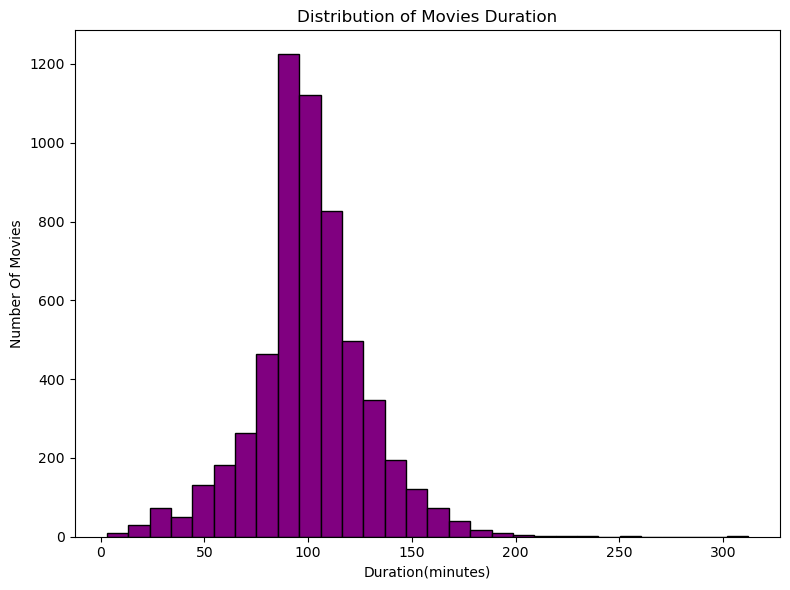

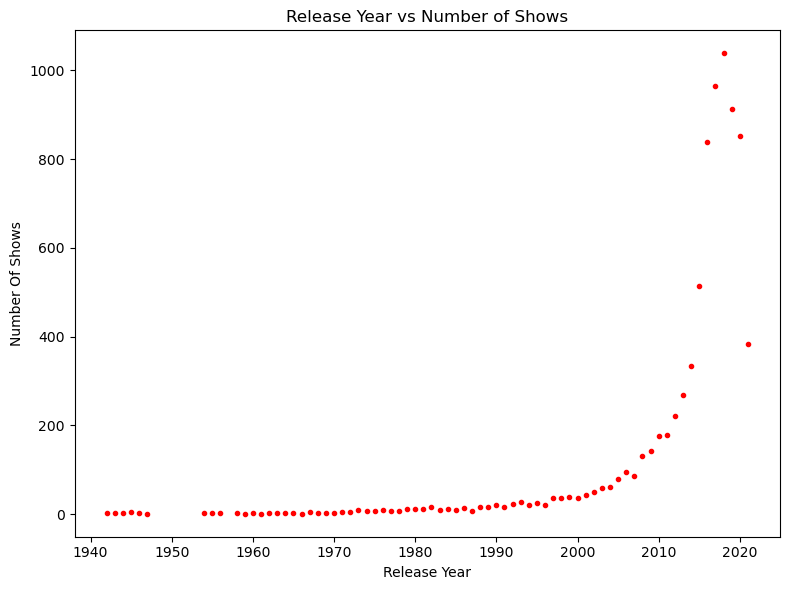

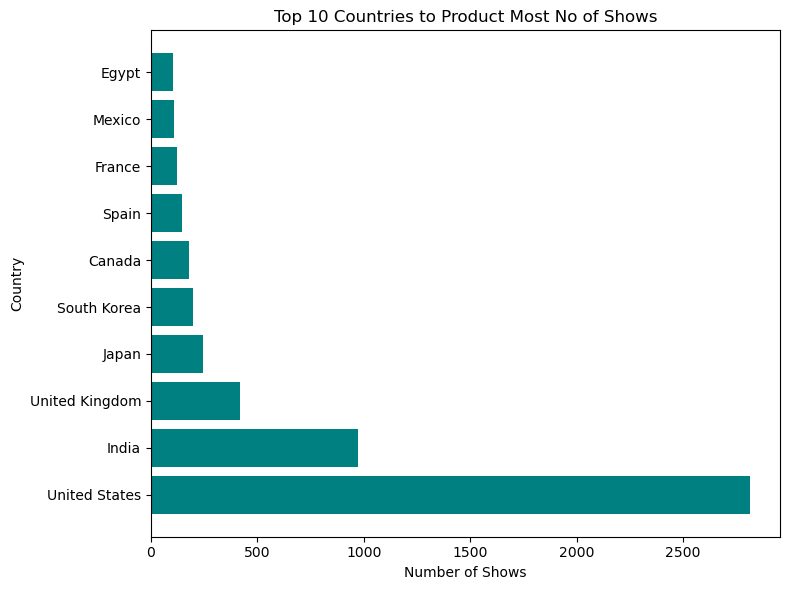

In [37]:


df = df.dropna(subset=['type','country','duration','rating','release_year'])

# comparing the no of movies and tvshows 
type_count = df['type'].value_counts()
plt.figure(figsize = (6,4))
plt.bar(type_count.index, type_count.values, color = ['skyblue', 'orange'])
plt.title('Number of Movies And TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png')
plt.show()

# finding the percentage of content rating
rating_count = df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_count, labels = rating_count.index,autopct = '%1.1f%%', startangle=90)
plt.title('Percentage of Content Rating')
plt.tight_layout()
plt.savefig('content_rating.png')
plt.show()

# finding the distribution of movies duration by using histogram
movies_df = df[df['type']=='Movie'].copy()
movies_df['duration_int'] = movies_df['duration'].str.replace(' min','').astype(int)
plt.figure(figsize=(8,6))
plt.hist(movies_df['duration_int'], bins=30, color = 'purple', edgecolor='black')
plt.title('Distribution of Movies Duration')
plt.xlabel('Duration(minutes)')
plt.ylabel('Number Of Movies')
plt.tight_layout()
plt.savefig('Movies_Duration.png')
plt.show()

# finding out the number of shows(movies and tv shows) released in all years
# release data vs no of shows
release_count = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(8,6))
plt.scatter(release_count.index, release_count.values,color='red', marker ='.')
plt.title('Release Year vs Number of Shows')
plt.xlabel('Release Year')
plt.ylabel('Number Of Shows')
plt.tight_layout()
plt.savefig('realase_year-vs-no_of_shows.png')
plt.show()

# top 10 countries which has most no of shows
shows_count = df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(shows_count.index, shows_count.values,color='teal')
plt.title('Top 10 Countries to Product Most No of Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('Top_10_Countries.png')
plt.show()

# Subplots

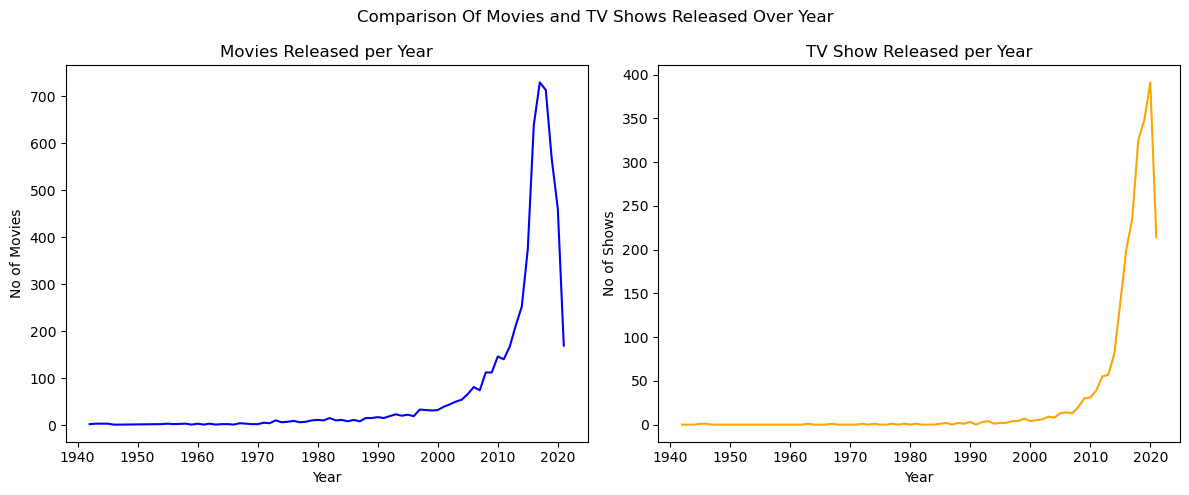

In [46]:
content_by_year = df.groupby(['release_year','type']).size().unstack().fillna(0)

fig, ax = plt.subplots(1,2, figsize=(12,5))

# 1st subplot - Movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='blue')
ax[0].set_title("Movies Released per Year")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("No of Movies")

# 2nd subplot - TV Shows
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color='orange')
ax[1].set_title("TV Show Released per Year")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("No of Shows")

fig.suptitle("Comparison Of Movies and TV Shows Released Over Year")
plt.tight_layout()
plt.savefig("movies_tv_shows_comparison.png")
plt.show()